In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from collections import defaultdict
%matplotlib inline

This dataset is pulled from https://mappingpoliceviolence.org/

Questions
#1
Is the overall number of police killings going up/down each year?

#2
Are there significant disparities in the police killing trends for different racial groups from year to year (is it consistently going up for one group and down for another)?

#3
Are there differences in the police killing trends for racial groups in different weapons categories from year to year (i.e. are murders of unarmed victims for one group going up while murders of armed victims of another group is going down)?

#4
Which state have the highest disparities between % of population that is black vs. % of police victims that are black. In those states, how many unarmed vs. armed black people were killed? Do the number of unarmed and armed victims in high disparity states deviate significantly from the national mean?

By answering these questions, we can see if the trend is getting better or worse, and if the number of UNARMED black victims is higher or lower than the average in states with high disparity.


In [113]:
#Clean up data set before starting and check data types
policekill = pd.read_csv('Police Killings Overall.csv')
policekill.drop(["Victim's name", "Victim's gender","City","Criminal Charges?", "WaPo ID (If included in WaPo database)", "Symptoms of mental illness?", "Agency responsible for death","Fleeing (Source: WaPo)","Alleged Threat Level (Source: WaPo)","Victim's age", "URL of image of victim", "Street Address of Incident", "Zipcode", "County", "A brief description of the circumstances surrounding the death","Body Camera (Source: WaPo)","Official disposition of death (justified or other)", "Alleged Weapon (Source: WaPo)","Link to news article or photo of official document", "Unnamed: 24"], axis = 1, inplace=True)
policekill.rename(columns={"Victim's race":"Race", "Date of Incident (month/day/year)":"Date"}, inplace=True)
policekill['Date'] = pd.to_datetime(policekill['Date'], format='%m/%d/%y')
policekill = policekill.set_index(policekill['Date'])
policekill = policekill.sort_index()
policekill.replace('Vehicle', 'Allegedly Armed', inplace = True)
policekill.replace('Unknown race', 'Unknown Race', inplace=True)
# policekill.Unarmed.unique()

policekill.head(20)

,Race,Date,State,Cause of death,Unarmed
Date,,,,,
2013-01-01,White,2013-01-01,MN,Taser,Allegedly Armed
2013-01-01,Black,2013-01-01,NE,Gunshot,Allegedly Armed
2013-01-01,Hispanic,2013-01-01,CA,Gunshot,Allegedly Armed
2013-01-01,White,2013-01-01,WI,Gunshot,Allegedly Armed
2013-01-01,Hispanic,2013-01-01,NM,Gunshot,Allegedly Armed
2013-01-01,Hispanic,2013-01-01,CO,Gunshot,Allegedly Armed
2013-01-02,Unknown Race,2013-01-02,FL,Gunshot,Allegedly Armed
2013-01-03,Black,2013-01-03,NC,Allegedly Armed,Allegedly Armed
2013-01-03,White,2013-01-03,CA,Gunshot,Allegedly Armed


In [114]:
policekill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6838 entries, 2013-01-01 to 2018-12-31
Data columns (total 5 columns):
Race              6838 non-null object
Date              6838 non-null datetime64[ns]
State             6838 non-null object
Cause of death    6838 non-null object
Unarmed           6838 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 213.7+ KB


In [115]:
#Question 1: Are police killings going down overall (2013 - 2018)?
y2018 = policekill['2018-01-01':'2018-12-31']
y2017 = policekill['2017-01-01':'2017-12-31']
y2016 = policekill['2016-01-01':'2016-12-31']
y2015 = policekill['2015-01-01':'2015-12-31']
y2014 = policekill['2014-01-01':'2014-12-31']
y2013 = policekill['2013-01-01':'2013-12-31']
    
Years = ['2018', '2017', '2016', '2015', '2014', '2013']
year_array = [len(y2018), len(y2017), len(y2016), len(y2015), len(y2014), len(y2013)]
p_kill_df = pd.DataFrame(year_array)
p_kill_df.columns = ['# Victims']
p_kill_df.index = [Years]
p_kill_df

,# Victims
2018,1164
2017,1146
2016,1130
2015,1187
2014,1131
2013,1080


In [116]:
pk_std = np.std(p_kill_df['# Victims'], ddof = 1)
pk_se = pk_std / np.sqrt(len(p_kill_df['# Victims']))

def sum_stat(): #quick way to see stats of p_kill
    print(np.mean(p_kill_df['# Victims']))
    print(np.var(p_kill_df['# Victims']))
    print(pk_std)
    print(pk_se)
    
sum_stat()

1139.6666666666667
1100.222222222222
36.33547394305827
14.83389512044778


Question #1: Is the overall number of police killings going up or down each year?

Text(0.5, 0, 'Years')

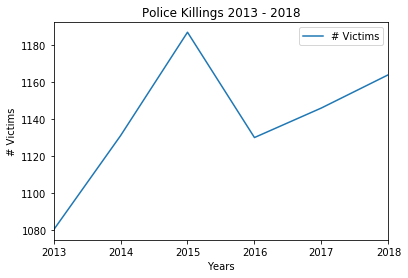

In [117]:
Q_1 = p_kill_df.pivot_table(index = [Years], values = ['# Victims'], aggfunc = np.sum).plot()
plt.ylabel('# Victims')
plt.title('Police Killings 2013 - 2018')
plt.xlabel('Years')

Answer #1: Since 2013, the overall number of fatalities as a result of police brutality has increased, but not in a reliable way given the small spike in 2015 (56 more fatalities than the previous year and 57 more than the following year), subsequent decline in 2016 and rise in 2017 and 2018. Some potential reasons for these numbers are: 

- Much of this data is gleaned from news stories, articles, and police records. If these data sources were compiled in the late 2010's, then finding information about fatal police encounters from several years ago will be more difficult.

- Police brutality has become a focus of many social justice and activist groups within the last few years, with 2013 being a landmark year. Black Lives Matter was founded in July 2013 at a time when police brutality came under high scrutiny. Social media played a part in the growth of online activism and grassroots movements. Methods for gathering information on police brutality may have been rudimentary and unrefined at the time (2013) and have improved over time, particularly with more police departments attempting to be transparent in the face of community outrage. Better reporting on police brutality and improved methods of research could be a cause for the increase in documented fatalities.

- Police departments have come under fire for use of unnecessary force and have responded with promises of improved training and greater transparency. Further study is required to assess if these promises have materialized, however this could be a reason for the decline in 2016. Although fatalities have increased from 2016 to 2018, the rate of increase has slowed compared to 2013 - 2015. Again, this could be a result of reporting methods.

Question #2: What are the trends in police killings from 2013 - 2018 for different racial groups?

In [118]:
policekill['Year'] = policekill['Date'].dt.year

In [119]:
policekill.head()

,Race,Date,State,Cause of death,Unarmed,Year
Date,,,,,,
2013-01-01,White,2013-01-01,MN,Taser,Allegedly Armed,2013
2013-01-01,Black,2013-01-01,NE,Gunshot,Allegedly Armed,2013
2013-01-01,Hispanic,2013-01-01,CA,Gunshot,Allegedly Armed,2013
2013-01-01,White,2013-01-01,WI,Gunshot,Allegedly Armed,2013
2013-01-01,Hispanic,2013-01-01,NM,Gunshot,Allegedly Armed,2013


In [120]:
policekill.drop(columns = ['Cause of death', 'State'], inplace = True)

In [121]:
policekill.groupby(['Race', 'Unarmed', 'Year']).count()

Date
Race  Unarmed         Year      
Asian Allegedly Armed 2013    22
                      2014    16
                      2015    23
                      2016    10
                      2017    10
...                          ...
White Unclear         2014    14
                      2015    20
                      2016    46
                      2017    29
                      2018    53

[111 rows x 1 columns]

In [122]:
police_kill_2 = pd.concat([policekill, pd.get_dummies(policekill['Race'])], axis=1)

In [123]:
police_kill_2.head()

,Race,Date,Unarmed,Year,Asian,Black,Hispanic,Native American,Pacific Islander,Unknown Race,White
Date,,,,,,,,,,,
2013-01-01,White,2013-01-01,Allegedly Armed,2013,0,0,0,0,0,0,1
2013-01-01,Black,2013-01-01,Allegedly Armed,2013,0,1,0,0,0,0,0
2013-01-01,Hispanic,2013-01-01,Allegedly Armed,2013,0,0,1,0,0,0,0
2013-01-01,White,2013-01-01,Allegedly Armed,2013,0,0,0,0,0,0,1
2013-01-01,Hispanic,2013-01-01,Allegedly Armed,2013,0,0,1,0,0,0,0


Below is a plot depicting the numbers of victims killed by police each year from 2013 - 2018, broken down by racial group.

Text(0.5, 1.0, 'Police Killings 2013 - 2018 by Race')

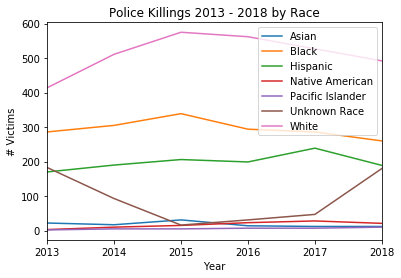

In [124]:
q_2 = police_kill_2.pivot_table(index = ['Year'], values = ['Asian', 'Black', 'Hispanic', 'White', 'Unknown Race', 'Native American', 'Pacific Islander'], aggfunc = np.sum).plot()
plt.ylabel('# Victims')
plt.title('Police Killings 2013 - 2018 by Race')

In [125]:
kill_totals = policekill.groupby(['Race', 'Year']).count()
kill_totals.drop(columns = 'Unarmed', inplace = True)
kill_totals.rename(columns={'Date':'# Victims'}, inplace = True)
kill_totals

# Victims
Race             Year           
Asian            2013         22
                 2014         17
                 2015         31
                 2016         14
                 2017         12
                 2018         12
Black            2013        286
                 2014        305
                 2015        339
                 2016        294
                 2017        286
                 2018        260
Hispanic         2013        170
                 2014        190
                 2015        206
                 2016        199
                 2017        239
                 2018        189
Native American  2013          3
                 2014         10
                 2015         15
                 2016         23
                 2017         28
                 2018         21
Pacific Islander 2013          2
                 2014          5
                 2015          5
                 2016          7
                 2017          7
                 2018         10
Unknown Race     2013        183
                 2014         93
                 2015         16
                 2016         31
                 2017         47
                 2018        180
White            2013        414
                 2014        511
                 2015        575
                 2016        562
                 2017        527
                 2018        492

Overall, the number of White victims of fatal police encounters dominates each year.

Other notable findings are that all racial groups have a steady or declining number of fatal encounter with the excpetion of victims of Unknown Race. I am unsure why the number of Unknown Race victims declines sharply before increasing rapidly again. This could be due to greater nuance in reporting the race of victims of police brutality, or an issue with reporting methods. Since the victims are of Unknown Race, it is difficult to zero in on a possible social catalyst for the uptick.

While this looks telling, it is widely known that the US is predominately White identifying which accounts for the higher number of fatalities among White Americans. The greater frequency does not necessarily correspond to a higher rate.

As of the 2010 census, the US is 64% non-hispanic White, and 72% White including White Latinos i.e. Whites of Hispanic origin. This is down from the 2000 census which saw 69% non-hispanic White and 75% White including White Latinos. One can expect this number to continue to decrease due to several documented reasons, including immigration, the aging population of White Americans, and lower birth rates among White Americans (and among well educated women of all races in general). Therefore, I can expect the 2020 census to reflect another decrease in the numbers of White Americans who may or may not identify as ethnically Hispanic. Even so, the number of White Americans in the US remains significantly larger than any other single demographic group.

In the absence of population counts for each racial group nationally or by state (except for African Americans, as the data set specifically provides information on the Black population  by state), I cannot comment on the rate of of fatal police encounters for each group compared to their overall national population numbers. This will pose an issue later on.

Question #3: What are the differences in the police killing trends for racial groups in different 'Unarmed' categories from year to year?

Below is a table showing the number of Allegedly Armed, Unarmed, and Unclearly Armed (armed status unknown or unagreed upon) for vicitims of various racial categories from 2013 - 2018.

In [406]:
armed_kill_race = policekill.groupby(['Race', 'Year', 'Unarmed']).count()
armed_kill_race.rename(columns={'Date':'# Victims'}, inplace = True)
armed_kill_race

# Victims
Race  Year Unarmed                   
Asian 2013 Allegedly Armed         22
      2014 Allegedly Armed         16
           Unarmed                  1
      2015 Allegedly Armed         23
           Unarmed                  7
...                               ...
White 2017 Unarmed                 69
           Unclear                 29
      2018 Allegedly Armed        386
           Unarmed                 53
           Unclear                 53

[111 rows x 1 columns]

Shown below is a plot depicting the number of armed victims from 2013 - 2018, again broken down by racial group.

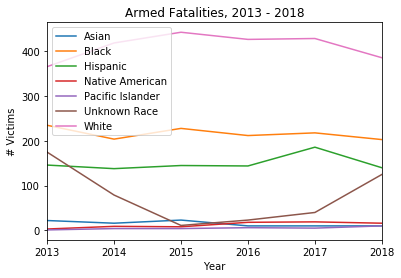

In [127]:
q_3_armed = police_kill_2.loc[police_kill_2['Unarmed'] == 'Allegedly Armed']
armed_plot = q_3_armed.pivot_table(index = ['Year'], values = ['Asian', 'Black', 'Hispanic', 'White', 'Unknown Race', 'Native American', 'Pacific Islander'], aggfunc = np.sum).plot()
plt.title('Armed Fatalities, 2013 - 2018')
plt.ylabel('# Victims')
armed_plot

Seen below is a plot of unarmed victims from 2013 - 2018.

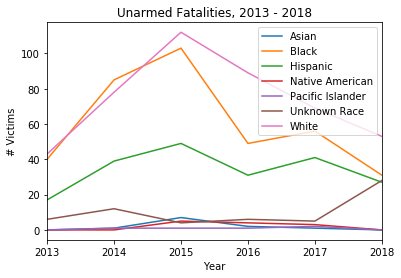

In [128]:
q_3_unarmed = police_kill_2.loc[police_kill_2['Unarmed'] == 'Unarmed']
unarmed_plot = q_3_unarmed.pivot_table(index = ['Year'], values = ['Asian', 'Black', 'Hispanic', 'White', 'Unknown Race', 'Native American', 'Pacific Islander'], aggfunc = np.sum).plot()
plt.title('Unarmed Fatalities, 2013 - 2018')
plt.ylabel('# Victims')
unarmed_plot

I noticed that White and Black racial groups had similar numbers of unarmed victims from 2013 - 2015 in spite of the fact that White Americans greatly outnumber Black Americans. In 2014 there were 85 Black unarmed fatalities vs 78 White unarmed fatalities. I checked my work below:

In [416]:
policekill.loc[policekill['Race'] == 'Black'].groupby(['Race', 'Year', 'Unarmed']).count()

Date
Race  Year Unarmed              
Black 2013 Allegedly Armed   235
           Unarmed            40
           Unclear            11
      2014 Allegedly Armed   204
           Unarmed            85
           Unclear            16
      2015 Allegedly Armed   228
           Unarmed           103
           Unclear             8
      2016 Allegedly Armed   212
           Unarmed            49
           Unclear            33
      2017 Allegedly Armed   218
           Unarmed            56
           Unclear            12
      2018 Allegedly Armed   203
           Unarmed            31
           Unclear            26

In [415]:
policekill.loc[policekill['Race'] == 'White'].groupby(['Race', 'Year', 'Unarmed']).count()

Date
Race  Year Unarmed              
White 2013 Allegedly Armed   366
           Unarmed            43
           Unclear             5
      2014 Allegedly Armed   419
           Unarmed            78
           Unclear            14
      2015 Allegedly Armed   443
           Unarmed           112
           Unclear            20
      2016 Allegedly Armed   427
           Unarmed            89
           Unclear            46
      2017 Allegedly Armed   429
           Unarmed            69
           Unclear            29
      2018 Allegedly Armed   386
           Unarmed            53
           Unclear            53

Lastly, here is a plot depicting victims whose unarmed status is unknown, meaning there are either conflicting reports of their armed status, or there is no available information regarding it.

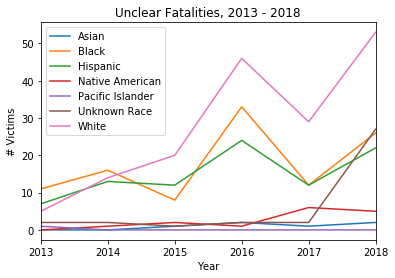

In [129]:
q_3_unclear = police_kill_2.loc[police_kill_2['Unarmed'] == 'Unclear']
unclear_plot = q_3_unclear.pivot_table(index = ['Year'], values = ['Asian', 'Black', 'Hispanic', 'White', 'Unknown Race', 'Native American', 'Pacific Islander'], aggfunc = np.sum).plot()
plt.title('Unclear Fatalities, 2013 - 2018')
plt.ylabel('# Victims')
unclear_plot

Armed Fatalities: The numbers hold fairly steady although Asian, Black and White demographic groups have a very slight uptick in 2015 which holds with the overall increase in fatalities that year. Fatalities among the Hispanic demographic peak in 2017 and Unknown Race is again a wild card with a sharp increase in 2018.

Unarmed Fatalities: White, Black and Hispanic all have a peak in 2015 in line with the overall spike that year. However, Black and Hispanic groups have another small spike in 2017 whereas the White demographic group does not. Asian and Native American also have a relatively small increase in unarmed fatalities in 2015, while the Unknown group starts off with a bump in 2014, then a decline followed by another sharp increase in 2018. Notable is that unarmed fatalities among Black and White racial groups are very close in number despite White Americans making up approximately 73% of the US population and Black Americans making up abut 13%.  

For instance, in 2013 there are 3 unarmed fatalities for the White racial group, but 40 for Black. In 2014, Black unarmed fatalities outnumber White ones. Pressure from activist groups and communities, as well as demands for transparency and better training for police departments, may be part of the reason for the dip in Black unarmed fatalities in 2016, and the continuing decline going into 2018.

Unclear Fatalities: Unknown group has a sharp increase in 2018 while White, Black and Hispanic all have a notable rise in 2016. The overall numbers for the ambiguously armed individuals display the most striking trend. For the four groups mentioned, all experienced a significant increase. An 'Unclear' armed status implies that there are conflicting reports on whether the victim was armed or not. Since lack of clarity is inherent, it is impossible to establish clearly why this group is trending upwards so quickly. However, it could be due to a few things, all of which require further study: 

- possible anti-police sentiment among witnesses
- false narratives by police departments seeking to mitigate culpability and cover up misconduct in light of high scrutiny
- false and/or inflammatory reporting by activist groups or news outlets that lack information.

Question #4

Which states have the highest and lowest disparity? In those states, how many unarmed vs. armed black people were killed? Do the % of armed and armed victims in high/low disparity states differ significantly from the national mean?

In [130]:
demos = pd.read_csv('Police Killings State.csv')

In [131]:
demos['Disparity'] = demos.Disparity.str.replace('%', '')
demos['Disparity'] = pd.to_numeric(demos['Disparity'],errors='coerce')
#'Disparity' is a percent value

In [228]:
demos.head(28)

,State,Population,African-American Alone,% African-American,% Victims Black,Disparity,# Black people killed,# Hispanic people killed,# Native American people killed,# Asian people killed,# Pacific Islanders killed,# White people killed,# Unknown Race people killed,# People Killed,Rate (Black People),Rate (All People)
0,New Hampshire,"1,316,470","15,035",1.14%,0%,-1,NaN,1.0,NaN,NaN,NaN,14,NaN,15,0.00,1.90
1,Vermont,"625,741","6,277",1.00%,0%,-1,NaN,1.0,1.0,NaN,NaN,6,NaN,8,0.00,2.13
2,North Dakota,"672,591","7,960",1.18%,0%,-1,NaN,NaN,4.0,NaN,NaN,8,NaN,12,0.00,2.97
3,South Dakota,"814,180","10,207",1.25%,0%,-1,NaN,NaN,8.0,1.0,NaN,10,2.0,21,0.00,4.30
4,Wyoming,"563,626","4,748",0.84%,0%,-1,NaN,2.0,1.0,NaN,NaN,12,2.0,17,0.00,5.03
5,Montana,"989,415","4,027",0.41%,0%,0,NaN,1.0,5.0,NaN,NaN,24,4.0,34,0.00,5.73
6,Connecticut,"3,574,097","362,296",10.14%,16%,6,5.0,5.0,NaN,1.0,NaN,18,2.0,31,2.30,1.45
7,New York,"19,378,102","3,073,800",15.86%,45%,29,67.0,19.0,NaN,2.0,NaN,51,9.0,148,3.63,1.27
8,South Carolina,"4,625,364","1,290,684",27.90%,33%,5,35.0,2.0,NaN,2.0,NaN,63,5.0,107,4.52,3.86
9,Michigan,"9,883,640","1,400,362",14.17%,35%,21,39.0,4.0,NaN,2.0,1.0,52,12.0,110,4.64,1.85


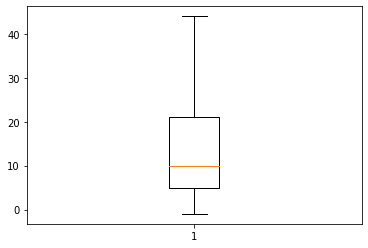

In [202]:
disparity_boxplot = plt.boxplot(demos['Disparity'])

In [221]:
demos['Disparity'].var()
np.std(demos['Disparity'] ,ddof=1) / np.sqrt(len(demos['Disparity']))
demos.describe()

,Disparity,# Black people killed,# Hispanic people killed,# Native American people killed,# Asian people killed,# Pacific Islanders killed,# White people killed,# Unknown Race people killed,# People Killed,Rate (Black People),Rate (All People)
count,51.000000,45.000000,44.000000,23.000000,28.000000,9.000000,51.000000,47.000000,51.000000,51.000000,51.000000
mean,13.529412,39.333333,27.090909,4.347826,3.857143,4.000000,60.392157,11.702128,134.039216,9.874314,4.038824
std,11.797208,40.876199,73.593737,3.773215,7.106149,5.049752,58.508488,16.338691,174.875494,7.741453,1.932241
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.950000
25%,5.000000,9.000000,2.750000,1.000000,1.000000,1.000000,24.500000,3.000000,34.500000,5.480000,2.590000
50%,10.000000,25.000000,7.000000,4.000000,2.000000,2.000000,47.000000,7.000000,103.000000,7.950000,4.020000
75%,21.000000,52.000000,13.750000,5.000000,3.250000,4.000000,78.500000,11.000000,157.000000,13.065000,4.725000
max,44.000000,170.000000,452.000000,12.000000,38.000000,16.000000,305.000000,93.000000,1071.000000,39.840000,10.120000


In [208]:
five_highest = demos.nlargest(5, 'Disparity')
five_highest

,State,Population,African-American Alone,% African-American,% Victims Black,Disparity,# Black people killed,# Hispanic people killed,# Native American people killed,# Asian people killed,# Pacific Islanders killed,# White people killed,# Unknown Race people killed,# People Killed,Rate (Black People),Rate (All People)
26,Rhode Island,"1,052,567","60,189",5.72%,50%,44,3.0,1.0,NaN,NaN,NaN,2,NaN,6,8.31,0.95
35,District of Columbia,"601,723","300,000",49.86%,92%,42,22.0,NaN,NaN,NaN,NaN,1,1.0,24,12.22,6.65
25,Illinois,"12,830,632","1,866,414",14.55%,52%,38,89.0,20.0,NaN,1.0,NaN,52,9.0,171,7.95,2.22
18,New Jersey,"8,791,894","1,204,826",13.70%,49%,35,50.0,13.0,NaN,2.0,NaN,29,9.0,103,6.92,1.95
19,Maryland,"5,773,552","1,700,298",29.45%,63%,34,74.0,7.0,NaN,NaN,NaN,28,8.0,117,7.25,3.38


In [220]:
# five_highest['Disparity'].var()
# np.std(five_highest['Disparity'], ddof = 1) / np.sqrt(len(five_highest['Disparity']))
five_highest.describe()

,Disparity,# Black people killed,# Hispanic people killed,# Native American people killed,# Asian people killed,# Pacific Islanders killed,# White people killed,# Unknown Race people killed,# People Killed,Rate (Black People),Rate (All People)
count,5.000000,5.000000,4.00000,0.0,2.000000,0.0,5.00000,4.00000,5.00000,5.000000,5.000000
mean,38.600000,47.600000,10.25000,NaN,1.500000,NaN,22.40000,6.75000,84.20000,8.530000,3.030000
std,4.335897,35.571056,8.13941,NaN,0.707107,NaN,21.36118,3.86221,68.37909,2.134912,2.200898
min,34.000000,3.000000,1.00000,NaN,1.000000,NaN,1.00000,1.00000,6.00000,6.920000,0.950000
25%,35.000000,22.000000,5.50000,NaN,1.250000,NaN,2.00000,6.25000,24.00000,7.250000,1.950000
50%,38.000000,50.000000,10.00000,NaN,1.500000,NaN,28.00000,8.50000,103.00000,7.950000,2.220000
75%,42.000000,74.000000,14.75000,NaN,1.750000,NaN,29.00000,9.00000,117.00000,8.310000,3.380000
max,44.000000,89.000000,20.00000,NaN,2.000000,NaN,52.00000,9.00000,171.00000,12.220000,6.650000


In [209]:
five_lowest = demos.nsmallest(5, 'Disparity')
five_lowest
#not useful here since all of the Disparity values are -1 and all of the % Victims Black values are 0!

,State,Population,African-American Alone,% African-American,% Victims Black,Disparity,# Black people killed,# Hispanic people killed,# Native American people killed,# Asian people killed,# Pacific Islanders killed,# White people killed,# Unknown Race people killed,# People Killed,Rate (Black People),Rate (All People)
0,New Hampshire,"1,316,470","15,035",1.14%,0%,-1,NaN,1.0,NaN,NaN,NaN,14,NaN,15,0.0,1.90
1,Vermont,"625,741","6,277",1.00%,0%,-1,NaN,1.0,1.0,NaN,NaN,6,NaN,8,0.0,2.13
2,North Dakota,"672,591","7,960",1.18%,0%,-1,NaN,NaN,4.0,NaN,NaN,8,NaN,12,0.0,2.97
3,South Dakota,"814,180","10,207",1.25%,0%,-1,NaN,NaN,8.0,1.0,NaN,10,2.0,21,0.0,4.30
4,Wyoming,"563,626","4,748",0.84%,0%,-1,NaN,2.0,1.0,NaN,NaN,12,2.0,17,0.0,5.03


In [224]:
value = 13.52
index = abs(demos['Disparity'] - value).idxmin()
print(index)

27


In [229]:
demos.loc[27]

State                              Minnesota
Population                         5,303,925
African-American Alone               274,412
% African-American                     5.17%
% Victims Black                          19%
Disparity                                 13
# Black people killed                     14
# Hispanic people killed                   4
# Native American people killed            4
# Asian people killed                      5
# Pacific Islanders killed               NaN
# White people killed                     46
# Unknown Race people killed               2
# People Killed                           75
Rate (Black People)                      8.5
Rate (All People)                       2.36
Name: 27, dtype: object

The five highest Disparity states are Rhode Island, District of Columbia, 'Illinois, New Jersey and Maryland. High disparity indicates that the percent of black victims of police brutality is disproportionately higher than the percentage of the population that is black. 

The five lowest states are New Hampshire, Vermont, North Dakota, South Dakota, and Wyoming. Notably, all have a disparity of -1%. They have a population that is 1-1.25% black but have no black casualties of police brutality.This is not very helpful for comparison or visualization (the mean of these states is -1 and all other statistical values are 0), so I will instead compare the highest disparity states to the average state, which is Minnesota.

Out of the five highest disparity states Maryland is the lowest is 34%. The boxplot above indicates that there are no outliers. 

For the column 'Disparity' in dataframe 'demos', I calculated disparity stats for all states:
The average national disparity is 13.529411764705882
The variance is 139.17411764705878
The standard deviation is 11.797208044578124
And the standard error is 1.6519395471957767

I also calculated these numbers for the five highest disparity states:
mean: 38.6,
variance: 18.8,
Standard deviation: 4.33589667773576,
Standard error: 1.9390719429665315

Minnesota has a disparity of 13% with 14 black casualties. A little over 5% of the state population is black, while 19% of black police brutality casualities in the state are black.

For visualization sake, I plotted the counts for armed, unarmed and unclearly armed black victims in the five higest disparity states and Minnesota.


In [133]:
blk_state = police_kill_state.loc[police_kill_state['Race'] == 'Black']
blk_state.drop(['Date', 'Cause of death'], axis = 1, inplace = True)

In [245]:
high_disparity = blk_state[blk_state["State"].isin(["RI", "DC", "IL", "NJ", "MD", "MN"])]
x = high_disparity.groupby(['State','Unarmed']).count()
x.rename(columns = {'Race': 'Victims'})

Victims
State Unarmed                 
DC    Allegedly Armed       16
      Unarmed                5
      Unclear                1
IL    Allegedly Armed       71
      Unarmed                8
      Unclear               10
MD    Allegedly Armed       54
      Unarmed               20
MN    Allegedly Armed       12
      Unarmed                1
      Unclear                1
NJ    Allegedly Armed       32
      Unarmed               11
      Unclear                7
RI    Allegedly Armed        2
      Unarmed                1

In [347]:
my_array = np.array([[16, 5, 1], [71, 8, 10], [54, 20, 0], [32, 11, 7], [2, 1, 0], [12, 1, 1]])
df = pd.DataFrame(my_array)
df.columns = ['Armed','Unarmed', 'Unclear']
df.index = ['DC', 'IL', 'MD', 'NJ', 'RI', 'MN']
df

,Armed,Unarmed,Unclear
DC,16,5,1
IL,71,8,10
MD,54,20,0
NJ,32,11,7
RI,2,1,0
MN,12,1,1


In [358]:
x = df.iloc[:, 0:3].sum(axis=1)
x

DC    22
IL    89
MD    74
NJ    50
RI     3
MN    14
dtype: int64

Text(0.5, 1.0, 'Black Victims in High Disparity States vs Minnesota')

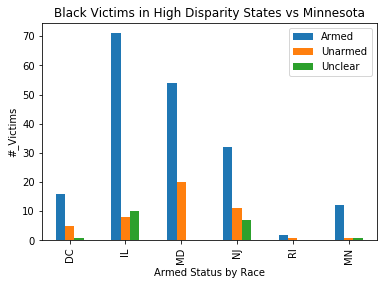

In [351]:
bp = df.plot.bar()
plt.xlabel('Armed Status by Race')
plt.ylabel('#_Victims')
plt.title('Black Victims in High Disparity States vs Minnesota')

The above is great, but to really compare the high disparity states with the average, we need to use percentages.

In [362]:
df['% Armed'] = (df['Armed']/x)*100
df['% Unarmed'] = (df['Unarmed']/x)*100
df['% Unclear'] = (df['Unclear']/x)*100
df

,Armed,Unarmed,Unclear,% Armed,% Unarmed,% Unclear
DC,16,5,1,72.727273,22.727273,4.545455
IL,71,8,10,79.775281,8.988764,11.235955
MD,54,20,0,72.972973,27.027027,0.000000
NJ,32,11,7,64.000000,22.000000,14.000000
RI,2,1,0,66.666667,33.333333,0.000000
MN,12,1,1,85.714286,7.142857,7.142857


Rhode Island, which is the highest disparity state in the US, also has the highest number of unarmed black casualties. However, New Jersey has the highest number of ambiguously armed black victims along with the third highest number of Unarmed victims. It also has the lowest number of armed victims. While it does not have the highest over number of black casualties, it has ab high number of unarmed + ambiguously armed victims, and the lowest number of armed victims among the high disparity states. 

As a final aside, the state with the highest number of black people killed is California, however the disparity is 10%. I compared this to the 

In [363]:
demos.nlargest(1,'# Black people killed')

,State,Population,African-American Alone,% African-American,% Victims Black,Disparity,# Black people killed,# Hispanic people killed,# Native American people killed,# Asian people killed,# Pacific Islanders killed,# White people killed,# Unknown Race people killed,# People Killed,Rate (Black People),Rate (All People)
36,California,"37,253,956","2,299,072",6.17%,16%,10,170.0,452.0,5.0,38.0,8.0,305,93.0,1071,12.32,4.79


In [366]:
highest_num = blk_state[blk_state["State"].isin(["CA"])]
x = highest_num.groupby(['State','Unarmed']).count()
x.rename(columns = {'Race': 'Victims'})

Victims
State Unarmed                 
CA    Allegedly Armed      113
      Unarmed               41
      Unclear               16

In [394]:
ca_array =np.array([113, 41, 16])
ca_df = pd.DataFrame(ca_array)
ca_df.columns = ['# Victims']
ca_df.index = ['Armed', 'Unarmed', 'Unclear']
y = ca_df.iloc[:, 0].sum()
ca_df['% of total'] = (ca_df['# Victims']/y)*100
ca_df

,# Victims,% of total
Armed,113,66.470588
Unarmed,41,24.117647
Unclear,16,9.411765


The percentage of unarmed + unclearly armed black victims killed by police in California is about 33.5%, which is lower than New Jersey's 36% in spite of the fact that New Jersey has a fraction of the population size of California. New Jersey does have a larger percentage of black residents than CA, about double. Still, this doesn't justify the higher rate of unarmed or unclearly armed victims in NJ. 

Out of all states, New Jersey appears to be one of the most problematic due to the low number of armed fatalities compared to other high disparity states, and compared to the average state (Minnesota) and the states with the highest number of black fatalities (California).

The average disparity nationwide is about 13 - 14%, and the highest disparity states have double and sometimes triple this. A large Black population relative to the overall population is not indicative of high disparity (see Rhode Island). Additionally, it is important to look at the number of Armed fatalities and compare that to the number of unarmed fatalities, given that armed victims may have posed a danger to police and thereby fully justified the use of deadly force. By focusing on Unarmed fatalities, we can better understand which states have higher incidents of excessive force that is unjustified. 